In [1]:
import pandas as pd
train_load = pd.read_csv('data/train_ctrUa4K.csv')
train_load.head(30)
#train_load.shape #Train Dataset has 614 rows and 13 columns

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [2]:
train_load.describe(include='all') #Credit History should be converted to boolean

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002940,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


## Handling Missing Values

In [3]:
train_load.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
#Ignoring Gender
train_load = train_load.drop(['Gender','Loan_ID'],axis=1)

#### Couldn't find a good variable relationship to impute missing values for married columns. So removing the three rows

In [5]:
is_married = train_load['Married'].notnull() 
train_load = train_load[is_married]

#### Assumption of the model is that if the person is married, he should have atleast 1 dependent. Hence, wherever this value is zero we are taking it to be 1.

In [6]:
marryyes = train_load['Married']=='Yes'  
dependzero = train_load['Dependents']=='0'
train_load[marryyes & dependzero]

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
6,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
18,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N
19,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
594,Yes,0,Graduate,Yes,16120,0.0,260.0,360.0,1.0,Urban,Y
598,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural,Y
601,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y
605,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N


In [7]:
#Wherever data for married is yes and dependent is 0, we set to dependent = 1
train_load.loc[marryyes & dependzero,'Dependents'] = '1'

In [8]:
from scipy.stats import mode
modedep = train_load.pivot_table(values='Dependents', columns='Married',aggfunc=(lambda x:mode(x).mode[0]) )
miss_bool = train_load['Dependents'].isnull()
train_load.loc[miss_bool,'Dependents'] = train_load.loc[miss_bool,'Married'].apply(lambda x: modedep[x])

#### To impute loan amt and loan amount term, we impute using the column mean values. Self Employed and Credit History also imputed using the mode value.

In [9]:
meanloanamt = train_load['LoanAmount'].mean()
train_load['LoanAmount'].fillna(meanloanamt,inplace=True)
meanloanterm = train_load['Loan_Amount_Term'].mean()
train_load['Loan_Amount_Term'].fillna(meanloanterm,inplace=True)
train_load['Self_Employed'].fillna('No',inplace=True)
train_load['Credit_History'].fillna('1.0',inplace=True)

In [10]:
train_load.isnull().sum()

Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Dummy Variables

In [11]:
train_load = pd.get_dummies(train_load,columns=['Married','Dependents','Education','Self_Employed','Property_Area'])

## Feature Engineering

In [12]:
train_load['EMI'] = train_load['LoanAmount']/train_load['Loan_Amount_Term']
train_load['TotalIncome'] = train_load['ApplicantIncome'] + train_load['CoapplicantIncome']
y_lr = train_load['Loan_Status']
X_lr = train_load.drop(['Loan_Status','LoanAmount','Loan_Amount_Term','ApplicantIncome','CoapplicantIncome'],axis=1)

## Baseline Model: Random Forest

In [13]:
from sklearn import preprocessing,model_selection
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
X_rf_train, X_rf_test, y_rf_train, y_rf_test = model_selection.train_test_split(X_lr, y_lr, 
                                                                                test_size = 0.3, random_state = 1)

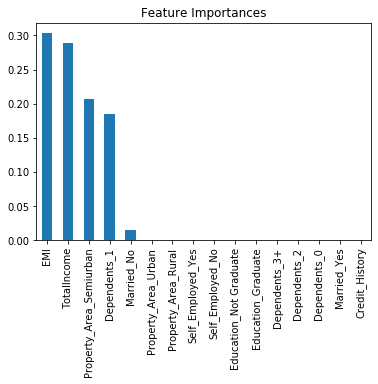

In [14]:
model_rf = RandomForestClassifier(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
model_rf.fit(X_rf_train,y_rf_train)
coef_rf = pd.Series(model_rf.feature_importances_, X_lr.columns).sort_values(ascending=False)
coef_rf.plot(kind='bar', title='Feature Importances')

In [15]:
accuracy = model_rf.score(X_rf_test,y_rf_test)
accuracy

0.6847826086956522

## Hypertuning: Random Forest

In [16]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 8)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 10, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid
#the benefit of a random search is that we are not trying every combination, 
#but selecting at random to sample a wide range of values.

{'n_estimators': [20, 45, 71, 97, 122, 148, 174, 200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [4, 5, 6, 7, 8, 10, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [17]:
# Use the random grid to search for best hyperparameters
model_randomized = RandomForestClassifier()
model_rf_randomized = RandomizedSearchCV(estimator = model_randomized, param_distributions = random_grid, 
                                         n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)
model_rf_randomized.fit(X_rf_train, y_rf_train)
model_rf_randomized.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   11.0s finished


{'n_estimators': 122,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5,
 'bootstrap': True}

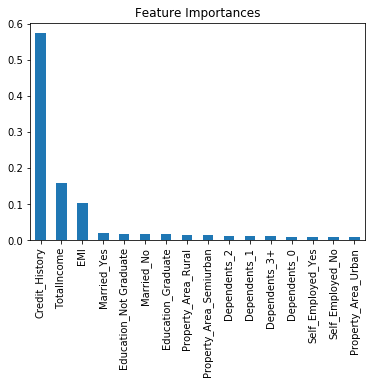

In [18]:
model_rf = RandomForestClassifier(n_estimators=120,min_samples_split=10,max_depth=5,bootstrap=True,
                                  max_features='sqrt',min_samples_leaf=1,n_jobs=-1)
model_rf.fit(X_rf_train,y_rf_train)
coef_rf = pd.Series(model_rf.feature_importances_, X_lr.columns).sort_values(ascending=False)
coef_rf.plot(kind='bar', title='Feature Importances')

#### The most important parameters for loan approval are Credit_History, TotalIncome and EMI.

In [19]:
model_rf.score(X_rf_test,y_rf_test)

0.8097826086956522

## Hypertuning: Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
model_logr = LogisticRegression(max_iter=300,penalty='l2',solver='liblinear')
model_logr.fit(X_rf_train,y_rf_train)
model_logr.score(X_rf_test,y_rf_test)

0.8097826086956522

## Baseline Model: XG Boost

In [21]:
y_lr = train_load['Loan_Status']
y_lr = y_lr.apply(lambda x: 0 if x=='N' else 1)
X_lr = train_load.drop('Loan_Status',axis=1)

In [22]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
X_lr['Credit_History'] = pd.to_numeric(X_lr['Credit_History'])
data_dmatrix = xgb.DMatrix(data=X_lr,label=y_lr)
X_xg_train, X_xg_test, y_xg_train, y_xg_test = model_selection.train_test_split(X_lr,y_lr,test_size=0.3)
model_xg = xgb.XGBClassifier(objective ='reg:logistic', learning_rate = 0.1,max_depth = 5, n_estimators = 1000)
model_xg.fit(X_xg_train,y_xg_train)
sc = model_xg.score(X_xg_test,y_xg_test)
print("Accuracy:%f" % (sc))

/home/anuj/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Accuracy:0.771739


## Hypertuning: XG Boost

In [23]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

params_xg = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.1, 0.3],
        'reg_lambda': [0.1, 1.0, 5.0],
        'n_estimators': [100,400,800,1000]}

In [25]:
model_randomized = xgb.XGBClassifier()
model_xg_randomized = RandomizedSearchCV(estimator = model_randomized, param_distributions = params_xg, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = 7)# Fit the random search model
model_xg_randomized.fit(X_xg_train, y_xg_train)
model_xg_randomized.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  27 tasks      | elapsed:    3.2s
[Parallel(n_jobs=7)]: Done 148 tasks      | elapsed:    9.3s
[Parallel(n_jobs=7)]: Done 300 out of 300 | elapsed:   16.9s finished


{'subsample': 0.9,
 'silent': False,
 'reg_lambda': 0.1,
 'n_estimators': 100,
 'min_child_weight': 3.0,
 'max_depth': 10,
 'learning_rate': 0.001,
 'gamma': 0.3,
 'colsample_bytree': 1.0,
 'colsample_bylevel': 1.0}

In [26]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
X_lr['Credit_History'] = pd.to_numeric(X_lr['Credit_History'])

data_dmatrix = xgb.DMatrix(data=X_lr,label=y_lr)
X_xg_train, X_xg_test, y_xg_train, y_xg_test = model_selection.train_test_split(X_lr,y_lr,test_size=0.3)
model_xg = xgb.XGBClassifier(objective ='reg:logistic',subsample=0.9,reg_lambda=0.1,colsample_bytree=1,colsample_bylevel=1,
                             gamma=0.3,learning_rate = 0.001,max_depth = 10, n_estimators = 100,min_child_weight=3)
model_xg.fit(X_xg_train,y_xg_train)
sc = model_xg.score(X_xg_test,y_xg_test)
print("Accuracy:%f" % (sc))


Accuracy:0.804348


/home/anuj/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


### Prediction on Test Set

In [27]:
from scipy.stats import mode
test_load = pd.read_csv('data/test_lAUu6dG.csv')
test_load = test_load.drop('Gender',axis=1)
is_married = test_load['Married'].notnull() 
test_load = test_load[is_married]

#is_dependent = test_load['Dependents'].isnull() 
marryyes = test_load['Married']=='Yes'  
dependzero = test_load['Dependents']=='0'
test_load.loc[marryyes & dependzero,'Dependents'] = '1'

modedep = test_load.pivot_table(values='Dependents', columns='Married',aggfunc=(lambda x:mode(x).mode[0]) )
miss_bool = test_load['Dependents'].isnull()
test_load.loc[miss_bool,'Dependents'] = test_load.loc[miss_bool,'Married'].apply(lambda x: modedep[x])

meanloanamt = test_load['LoanAmount'].mean()
test_load['LoanAmount'].fillna(meanloanamt,inplace=True)
meanloanterm = test_load['Loan_Amount_Term'].mean()
test_load['Loan_Amount_Term'].fillna(meanloanterm,inplace=True)
test_load['Self_Employed'].fillna('No',inplace=True)
test_load['Credit_History'].fillna('1.0',inplace=True)

test_load['EMI'] = test_load['LoanAmount']/test_load['Loan_Amount_Term']
test_load['TotalIncome'] = test_load['ApplicantIncome'] + test_load['CoapplicantIncome']
test_load = test_load.drop(['LoanAmount','Loan_Amount_Term','ApplicantIncome','CoapplicantIncome'],axis=1)

test_load = pd.get_dummies(test_load,columns=['Married','Dependents','Education','Self_Employed','Property_Area'])
final_data = test_load.drop('Loan_ID',axis=1)

In [28]:
target = 'Loan_Status'
IDcol = ['Loan_ID']
test_load[target] = model_logr.predict(final_data)
IDcol.append(target)
final = test_load[IDcol]
submission = pd.DataFrame({ x: test_load[x] for x in IDcol})
final.to_csv('solution.csv', index=False)